In [32]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df=pd.read_csv('Fraud_check.csv')

In [21]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [22]:
df.shape

(600, 6)

In [23]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### As per the problem statement, people with Taxable Income less than 30,000 have to be termed Risky. 

In [25]:
df['Risky']= df['Taxable.Income']<=30000

In [26]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
595,YES,Divorced,76340,39492,7,YES,False
596,YES,Divorced,69967,55369,2,YES,False
597,NO,Divorced,47334,154058,0,YES,False
598,YES,Married,98592,180083,17,NO,False
599,NO,Divorced,96519,158137,16,NO,False


In [27]:
df[df['Risky']==True]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
10,NO,Single,29732,102602,19,YES,True
12,NO,Divorced,11794,148033,14,YES,True
16,YES,Divorced,24987,34551,29,NO,True
19,NO,Single,10987,126953,30,YES,True
21,YES,Divorced,14310,29106,7,YES,True
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,True
557,YES,Married,12810,157421,10,NO,True
567,YES,Single,16316,129912,30,NO,True
575,NO,Divorced,10735,95975,13,YES,True


In [28]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Undergrad :2 -- ['NO' 'YES']
The number of values for feature Marital.Status :3 -- ['Divorced' 'Married' 'Single']
The number of values for feature Taxable.Income :599
The number of values for feature City.Population :598
The number of values for feature Work.Experience :31
The number of values for feature Urban :2 -- ['NO' 'YES']
The number of values for feature Risky :2 -- [False  True]


In [29]:
df['Risky'].value_counts()

False    476
True     124
Name: Risky, dtype: int64

In [30]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
0,NO,Single,68833,50047,10,YES,False
1,YES,Divorced,33700,134075,18,YES,False
2,NO,Married,36925,160205,30,YES,False
3,YES,Single,50190,193264,15,YES,False
4,NO,Married,81002,27533,28,NO,False
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,False
596,YES,Divorced,69967,55369,2,YES,False
597,NO,Divorced,47334,154058,0,YES,False
598,YES,Married,98592,180083,17,NO,False


In [44]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

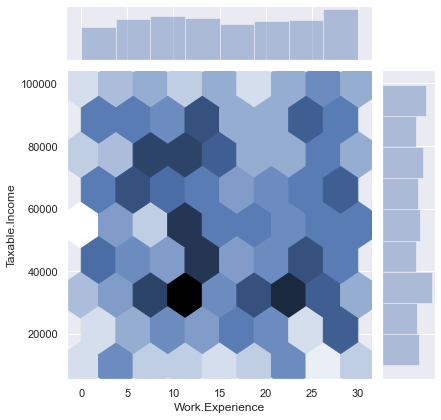

In [45]:
sns.jointplot(x='Work.Experience',y="Taxable.Income",data=df, kind= "hex")

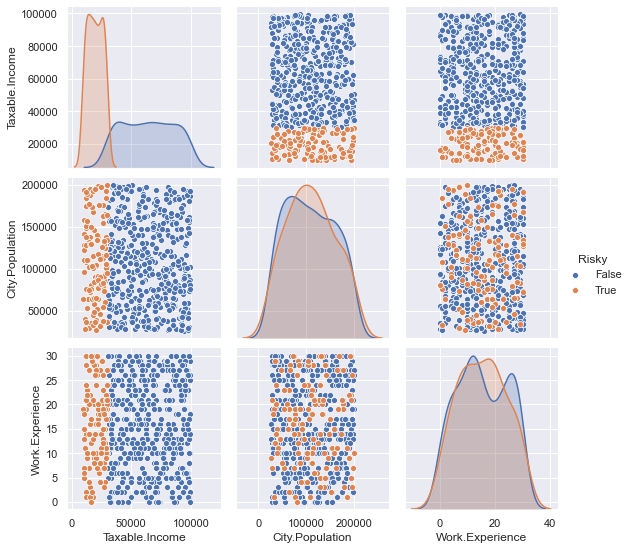

In [46]:
g= sns.pairplot(df,hue='Risky')

In [47]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Risky'],
      dtype='object')

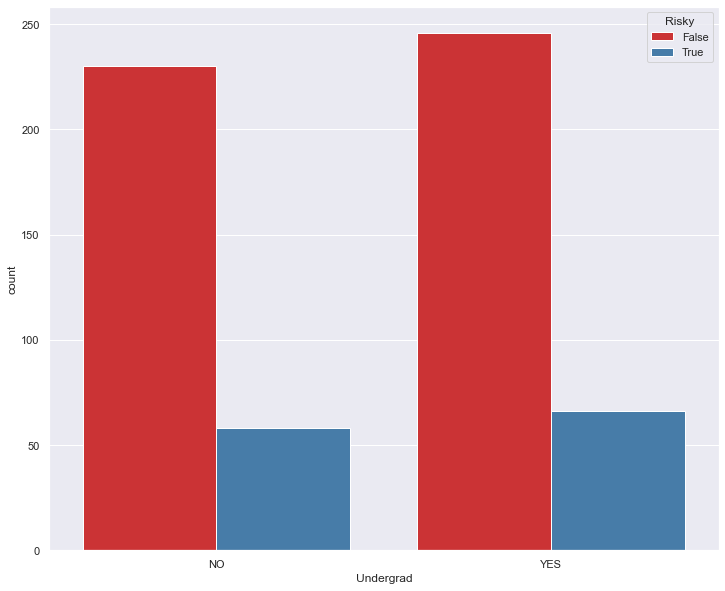

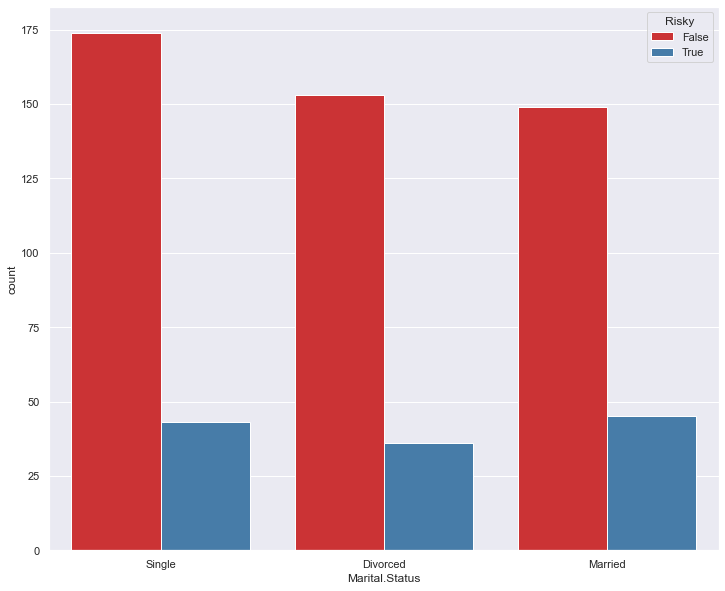

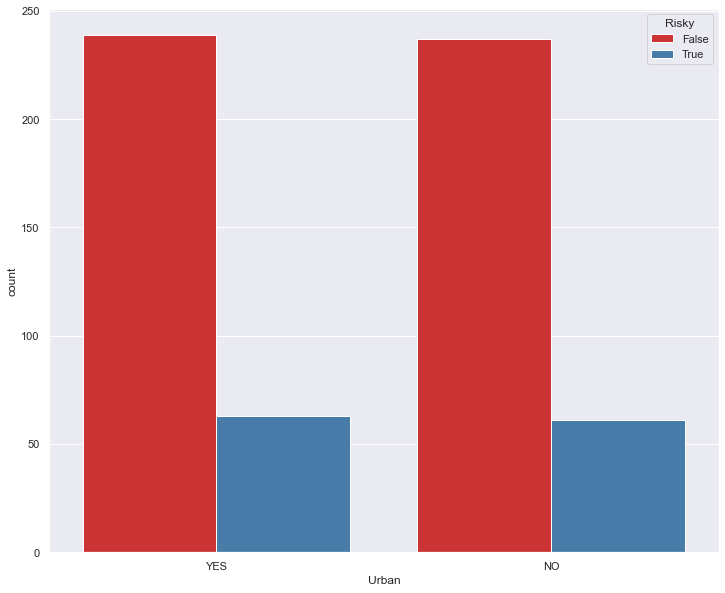

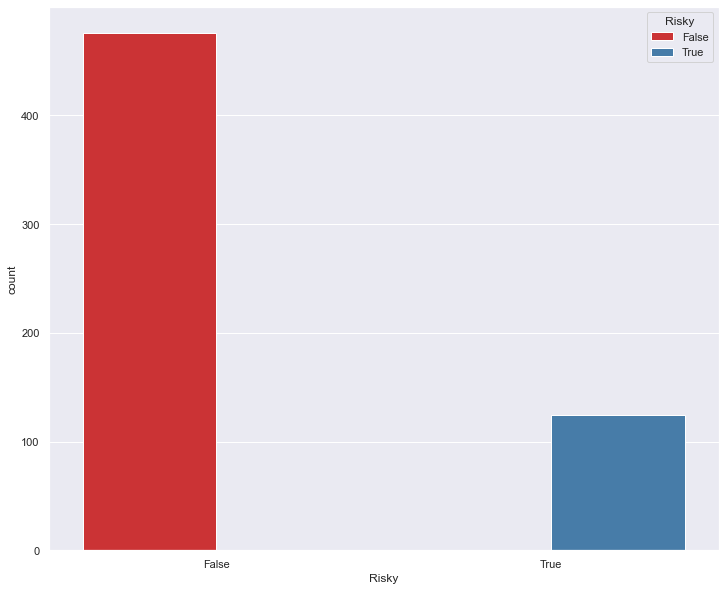

In [49]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Undergrad', 'Marital.Status','Urban', 'Risky']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set1', hue = 'Risky')
    plt.show()

In [50]:
# Making categorical variables into numeric representation

new_df = pd.get_dummies(df, columns = features, drop_first=True)

In [51]:
new_df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Risky_True
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,0
596,69967,55369,2,1,0,0,1,0
597,47334,154058,0,0,0,0,1,0
598,98592,180083,17,1,1,0,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
scale_vars = ['Taxable.Income', 'City.Population','Work.Experience']
scaler = MinMaxScaler()
new_df[scale_vars] = scaler.fit_transform(new_df[scale_vars])
new_df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Risky_True
0,0.656468,0.139472,0.333333,0,0,1,1,0
1,0.264428,0.622394,0.600000,1,0,0,1,0
2,0.300415,0.772568,1.000000,0,1,0,1,0
3,0.448436,0.962563,0.500000,1,0,1,1,0
4,0.792258,0.010081,0.933333,0,1,0,0,0


In [55]:
#Splitting the Data

In [57]:
X = new_df.drop('Risky_True', axis=1).values# Input features (attributes)
y = new_df['Risky_True'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

X shape: (600, 7)
y shape: (600,)


In [60]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [61]:
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  1.0
